### Import Libraries and Modules

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)

import utils.portfolio_management_functions as pm

### Check Excel file

In [2]:
# Check data in the file (sheets, columns, data):
try:
    pm.read_excel_default("data/proshares_analysis_data.xlsx", print_sheets = True)
except FileNotFoundError as e:
    print(f'{e}.\nCheck file in {parent_path}')
    


Sheet name: descriptions
Columns: Unnamed: 0, security_name
      Unnamed: 0                  security_name
0  EEM US Equity  iShares MSCI Emerging Markets
1  EFA US Equity          iShares MSCI EAFE ETF
2  EUO US Equity      ProShares UltraShort Euro
----------------------------------------------------------------------


Sheet name: hedge_fund_series
Columns: Unnamed: 0, HFRIFWI Index, MLEIFCTR Index, MLEIFCTX Index, HDG US Equity, QAI US Equity
  Unnamed: 0  HFRIFWI Index  MLEIFCTR Index  MLEIFCTX Index  HDG US Equity  QAI US Equity
0 2011-08-31        -0.0321         -0.0256         -0.0257        -0.0270        -0.0065
1 2011-09-30        -0.0389         -0.0324         -0.0326        -0.0325        -0.0221
2 2011-10-31         0.0269          0.0436          0.0433         0.0505         0.0252
----------------------------------------------------------------------


Sheet name: merrill_factors
Columns: Unnamed: 0, SPY US Equity, USGG3M Index, EEM US Equity, EFA US Equity, EUO US 

### Import Data and perform high level check

In [3]:
# Import data from the file:
hf_series = pd.read_excel('data/proshares_analysis_data.xlsx',sheet_name='hedge_fund_series',index_col=0)
merrill_factors = pd.read_excel('data/proshares_analysis_data.xlsx',sheet_name='merrill_factors',index_col=0)

In [4]:
# Check for potential outliers and nan values:
print(hf_series.describe())
print()
print(hf_series.isna().sum())
print()
print(merrill_factors.describe())
print()
print(merrill_factors.isna().sum())

       HFRIFWI Index  MLEIFCTR Index  MLEIFCTX Index  HDG US Equity  QAI US Equity
count       158.0000        158.0000        158.0000       158.0000       158.0000
mean          0.0040          0.0030          0.0029         0.0021         0.0021
std           0.0172          0.0162          0.0162         0.0169         0.0144
min          -0.0908         -0.0532         -0.0524        -0.0592        -0.0563
25%          -0.0045         -0.0047         -0.0049        -0.0059        -0.0065
50%           0.0047          0.0036          0.0036         0.0033         0.0025
75%           0.0130          0.0122          0.0120         0.0115         0.0096
max           0.0586          0.0589          0.0588         0.0583         0.0398

HFRIFWI Index     0
MLEIFCTR Index    0
MLEIFCTX Index    0
HDG US Equity     0
QAI US Equity     0
dtype: int64

       SPY US Equity  USGG3M Index  EEM US Equity  EFA US Equity  EUO US Equity  IWM US Equity
count       158.0000      158.0000       15

***

### Tail Risk

In [5]:
pm.stats_tail_risk(hf_series, var_quantile=0.05)

,Skewness,Excess Kurtosis,Historical VaR (5.0%),Historical CVaR (5.0%),Accumulated Return,Max Drawdown,Peak Date,Bottom Date,Recovery,Duration (days)
HFRIFWI Index,-0.9633,5.7631,-0.0243,-0.0375,0.8430,-0.1155,2019-12-31,2020-03-31,2020-08-31,153
MLEIFCTR Index,-0.2654,1.6316,-0.0282,-0.0359,0.5785,-0.1243,2021-06-30,2022-09-30,2024-02-29,517
MLEIFCTX Index,-0.2513,1.5959,-0.0281,-0.0358,0.5442,-0.1244,2021-06-30,2022-09-30,2024-02-29,517
HDG US Equity,-0.2542,1.7593,-0.0309,-0.0376,0.3553,-0.1407,2021-06-30,2022-09-30,2024-07-31,670
QAI US Equity,-0.4348,1.6059,-0.0179,-0.0327,0.3786,-0.1377,2021-06-30,2022-09-30,2024-02-29,517


***

### Cummulative Returns

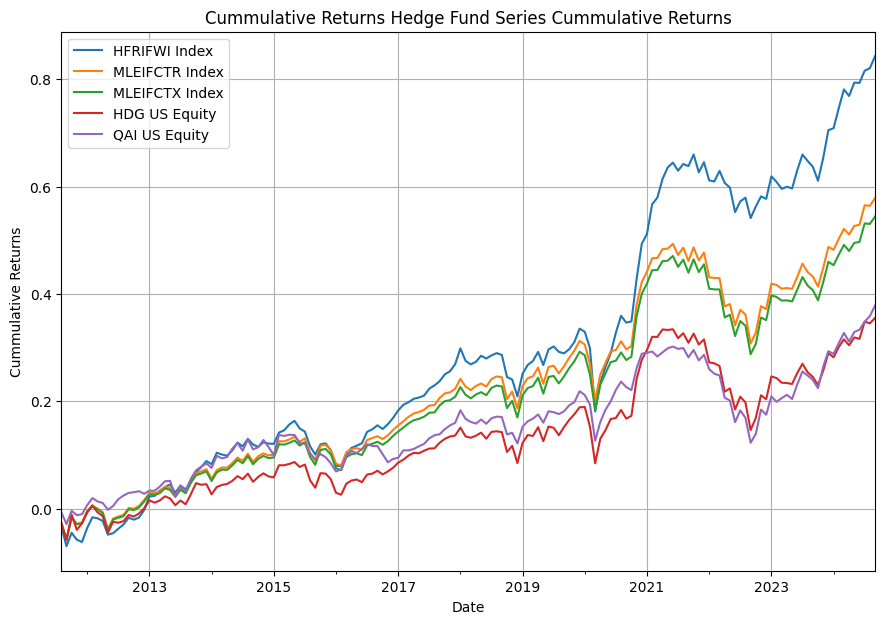

In [6]:

pm.calc_cummulative_returns(hf_series, name = 'Hedge Fund Series Cummulative Returns')

***

### Factor Decomposition

In [7]:
# Regression Analysis:
pm.get_regression_statistics(y = hf_series,
                            x = merrill_factors['SPY US Equity'],
                            intercept = True,
                            annual_factor = 12)

,Alpha,Annualized Alpha,P-value (Alpha),R-squared,Beta (SPY US Equity),P-Value (SPY US Equity),Tracking Error,Annualized Tracking Error,"(HFRIFWI Index, Treynor Ratio)","(HFRIFWI Index, Annualized Treynor Ratio)",Information Ratio,Annualized Information Ratio,Fitted Mean,Annualized Fitted Std Dev,"(MLEIFCTR Index, Treynor Ratio)","(MLEIFCTR Index, Annualized Treynor Ratio)","(MLEIFCTX Index, Treynor Ratio)","(MLEIFCTX Index, Annualized Treynor Ratio)","(HDG US Equity, Treynor Ratio)","(HDG US Equity, Annualized Treynor Ratio)","(QAI US Equity, Treynor Ratio)","(QAI US Equity, Annualized Treynor Ratio)"
HFRIFWI Index,-0.0001,-0.0011,0.9010,0.7115,0.3461,0.0000,0.0319,0.1107,0.0116,0.1395,-0.0103,-0.0358,0.0040,0.0483,0.0088,0.1057,0.0084,0.1011,0.0059,0.0705,0.0072,0.0860
MLEIFCTR Index,-0.0011,-0.0128,0.0894,0.7861,0.3434,0.0000,0.0260,0.0899,0.0116,0.1395,-0.1419,-0.4915,0.0030,0.0363,0.0088,0.1057,0.0084,0.1011,0.0059,0.0705,0.0072,0.0860
MLEIFCTX Index,-0.0012,-0.0143,0.0578,0.7849,0.3422,0.0000,0.0260,0.0899,0.0116,0.1395,-0.1586,-0.5495,0.0029,0.0346,0.0088,0.1057,0.0084,0.1011,0.0059,0.0705,0.0072,0.0860
HDG US Equity,-0.0021,-0.0255,0.0022,0.7632,0.3521,0.0000,0.0284,0.0985,0.0116,0.1395,-0.2587,-0.8963,0.0021,0.0248,0.0088,0.1057,0.0084,0.1011,0.0059,0.0705,0.0072,0.0860
QAI US Equity,-0.0014,-0.0170,0.0200,0.7478,0.2984,0.0000,0.0251,0.0870,0.0116,0.1395,-0.1950,-0.6756,0.0021,0.0257,0.0088,0.1057,0.0084,0.1011,0.0059,0.0705,0.0072,0.0860


***

### Correlation

The highest correlation (0.9999) is between MLEIFCTX Index and MLEIFCTR Index
The lowest correlation (0.8435) is between HFRIFWI Index and SPY


<Axes: >

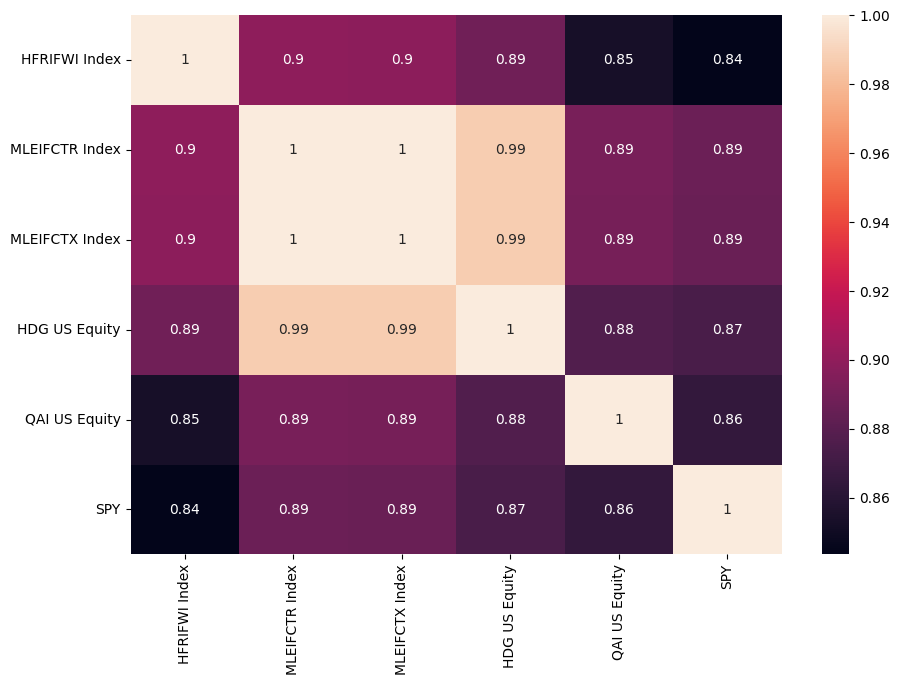

In [10]:
corr_returns = hf_series.assign(SPY = merrill_factors['SPY US Equity'])
pm.calc_correlations(corr_returns, print_highest_lowest=True)

***

### Rolling Window Replication

In [64]:
y = hf_series['HDG US Equity'].to_frame()
X = merrill_factors.copy()
import statsmodels.api as sm

In [65]:
rolling_size = 60
lag_number = 1
intercept = True
expanding = False

In [87]:
y = hf_series['HDG US Equity'].to_frame()
X = merrill_factors.copy()

X = X.shift(lag_number) # Lag the predictors

df = y.join(X, how='inner')
Y = df.iloc[:, [0]].copy()
X = df.iloc[:, 1:].copy()
y_name = y.columns[0]

significance_level = 0.05
annual_factor = 12
return_model_param = False
lag_periods = 1
window_size=60

# Add the intercept
if intercept:
    X = sm.add_constant(X)

# Check if y and X have the same length
if len(X.index) != len(Y.index):
    print(f'y has lenght {len(Y.index)} and X has lenght {len(X.index)}. Joining y and X by y.index...')
    df = Y.join(X, how='left')
    df = df.dropna()
    Y = df[y_name]
    X = df.drop(columns=y_name)
    if len(X.index) < len(X.columns) + 1:
        raise Exception('Indexes of y and X do not match and there are less observations than degrees of freedom. Cannot calculate regression')
    

summary_pred = pd.DataFrame({})	

for i in range(window_size, len(y.index)-lag_periods+1, 1):
    prediction_date = y.index[i+lag_periods-1]
    
    # Get the in-sample and ou-of-sample data
    
    y_in_sample = y.iloc[:i].copy()
    X_in_sample = X.iloc[:i].copy()
    if expanding == False: # Calculate using olling window
        y_in_sample = y_in_sample.iloc[-window_size:]
        X_in_sample = X_in_sample.iloc[-window_size:]
    X_out_sample = X.iloc[i+lag_periods-1, :].copy()
    Y_out_sample = y.iloc[i+lag_periods-1].copy()
    
    # Fit the regression model
    try:
        ols_model = sm.OLS(y_in_sample, X_in_sample, missing='drop')
    except ValueError:
        y = y.reset_index(drop=True)
        X = X.reset_index(drop=True)
        ols_model = sm.OLS(y, X, missing="drop")
        print(f'"Reset indexes was required to make regression work. Try passing "y" and "X" as pd.DataFrame')
    
    ols_results = ols_model.fit()
    
    y_pred = ols_results.predict(X_out_sample)[0]
    y_in_sample_mean = y_in_sample.mean().squeeze()
    y_actual = Y_out_sample.squeeze()
    
    summary_pred.loc[prediction_date,'Prediction'] = y_pred
    summary_pred.loc[prediction_date,'Naive Prediction (Mean)'] = y_in_sample_mean
    summary_pred.loc[prediction_date,'Actual'] = y_actual
    
    summary_pred.loc[prediction_date,'Prediction Error'] = summary_pred.loc[prediction_date,'Prediction'] - summary_pred.loc[prediction_date,'Actual']
    summary_pred.loc[prediction_date,'Total Error'] = summary_pred.loc[prediction_date,'Naive Prediction (Mean)'] - summary_pred.loc[prediction_date,'Actual']


if return_model_param:
    regression_statistics = pd.DataFrame(index=[y_name])

    # Calculate/get statistics:
    regression_params_names = []
    if intercept == True:
        regression_statistics.loc[y_name, 'Alpha'] = ols_results.params.iloc[0]
        regression_statistics.loc[y_name, 'Annualized Alpha'] = ols_results.params.iloc[0] * annual_factor # Annualized Alpha
        regression_statistics.loc[y_name, 'P-Value (Alpha)'] = ols_results.pvalues.iloc[0] # Alpha p-value
        regression_params_names.append('Alpha')
    else:
        print('No intercept in regression. OOS R-squared might not make statistical sense.')      
    
    X_names = list(X.columns[1:]) if intercept else list(X.columns)
    betas = ols_results.params[1:] if intercept else ols_results.params
    betas_p_values = ols_results.pvalues[1:] if intercept else ols_results.pvalues
    
    for i in range(len(X_names)):
        regression_statistics.loc[y_name, f"Beta ({X_names[i]})"] = betas.iloc[i] # Betas
        regression_params_names.append(X_names[i])
    for i in range(len(X_names)):
        regression_statistics.loc[y_name, f"P-Value ({X_names[i]})"] = betas_p_values.iloc[i] # Beta p-values

    rss = (np.array(summary_pred['Prediction Error']) ** 2).sum()
    tss = (np.array(summary_pred['Total Error']) ** 2).sum()
    oos_rsquared = 1 - rss / tss
    tracking_error = np.sqrt(rss / len(summary_pred))

    regression_statistics.loc[y_name, 'Tracking Error'] = tracking_error
    regression_statistics.loc[y_name, 'Annualized Tracking Error'] = tracking_error * (annual_factor ** 0.5) # Annualized Residuals Volatility
    regression_statistics.loc[y_name, 'OOS R-squared'] = oos_rsquared # R-squared
    
    regression_statistics_t = regression_statistics.T
    print(regression_params_names)
    print(regression_statistics_t)
    significant_params = [param for param in regression_params_names if regression_statistics_t.loc[f'P-Value ({param})', y_name] < significance_level]

    if len(significant_params) > 0:
        print(f'Significant parameters at a confidence level of {(1-significance_level):.1%}: {", ".join(significant_params)}')
    else:
        print(f'No significant parameters at {(1-significance_level):.1%} level of confidence')


In [60]:
y_name = y.columns[0]
annual_factor = 12
regression_statistics = pd.DataFrame(index=[y_name])

# Calculate/get statistics:
if intercept == True:
    regression_statistics.loc[y_name, 'Alpha'] = ols_results.params.iloc[0]
    regression_statistics.loc[y_name, 'Annualized Alpha'] = ols_results.params.iloc[0] * annual_factor # Annualized Alpha
    regression_statistics.loc[y_name, 'P-value (Alpha)'] = ols_results.pvalues.iloc[0] # Alpha p-value
else:
    print('No intercept in regression. OOS R-squared might not make statistical sense.')      

X_names = list(X.columns[1:]) if intercept else list(X.columns)
betas = ols_results.params[1:] if intercept else ols_results.params
betas_p_values = ols_results.pvalues[1:] if intercept else ols_results.pvalues

for i in range(len(X_names)):
    regression_statistics.loc[y_name, f"Beta ({X_names[i]})"] = betas.iloc[i] # Betas
for i in range(len(X_names)):
    regression_statistics.loc[y_name, f"P-Value ({X_names[i]})"] = betas_p_values.iloc[i] # Beta p-values

rss = (np.array(summary_pred['Prediction Error']) ** 2).sum()
tss = (np.array(summary_pred['Total Error']) ** 2).sum()
oos_rsquared = 1 - rss / tss
tracking_error = np.sqrt(rss / len(summary_pred))

regression_statistics.loc[y_name, 'Tracking Error'] = tracking_error
regression_statistics.loc[y_name, 'Annualized Tracking Error'] = tracking_error * (annual_factor ** 0.5) # Annualized Residuals Volatility
regression_statistics.loc[y_name, 'OOS R-squared'] = oos_rsquared # R-squared
regression_statistics_t = regression_statistics.T

In [61]:
regression_statistics_t

,HDG US Equity
Alpha,-0.0000
Annualized Alpha,-0.0005
P-value (Alpha),0.8255
Beta (const),-0.0000
Beta (SPY US Equity),-0.0268
Beta (USGG3M Index),3.7520
Beta (EEM US Equity),-0.1331
Beta (EFA US Equity),0.1154
Beta (EUO US Equity),-0.0060
Beta (IWM US Equity),0.0157


In [30]:
summary_pred.loc[y.index[i],'Prediction'] = y_pred[0]
summary_pred.loc[y.index[i],'Naive Prediction (Mean)'] = y_in_sample_mean.squeeze()
summary_pred.loc[y.index[i],'Actual'] = y_actual.squeeze()

In [95]:

def returns_to_df(returns, name: str = "Returns"):
    """
    Converts returns to a DataFrame if it is a Series or a list of Series.

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.

    Returns:
    pd.DataFrame: DataFrame of returns.
    """
    if isinstance(returns, pd.DataFrame):
        returns = returns.copy()
    if isinstance(returns, pd.Series):
        returns = returns.to_frame()
    elif isinstance(returns, list):
        returns_list = returns.copy()
        returns = pd.DataFrame({})

        for series in returns_list:
            if isinstance(series, pd.Series):
                returns = returns.merge(series, right_index=True, left_index=True, how='outer')
            else:
                raise TypeError(f'{name} must be either a pd.DataFrame or a list of pd.Series')
            
    # Convert returns to float
    try:
        returns = returns.apply(lambda x: x.astype(float))
    except ValueError:
        print(f'Could not convert {name} to float. Check if there are any non-numeric values')
        pass

    return returns


def fix_dates_index(returns: pd.DataFrame):
    """
    Fixes the date index of a DataFrame if it is not in datetime format and convert returns to float.

    Parameters:
    returns (pd.DataFrame): DataFrame of returns.

    Returns:
    pd.DataFrame: DataFrame with datetime index.
    """
    # Check if 'date' is in the columns and set it as the index

    if 'date' in returns.columns.str.lower():
        returns = returns.rename({'Date': 'date'}, axis=1)
        returns = returns.set_index('date')
    returns.index.name = 'date'

    # Convert dates to datetime
    try:
        returns.index = pd.to_datetime(returns.index.map(lambda x: x.date()))
    except ValueError:
        print('Could not convert the index to datetime. Check the index format for invalid dates.')
    
    # Convert returns to float
    try:
        returns = returns.apply(lambda x: x.astype(float))
    except ValueError:
        print('Could not convert returns to float. Check if there are any non-numeric values')
        pass

    return returns

In [99]:


from typing import Union, List, Callable

def calc_equal_weights_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    target_return: Union[float, None] = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_returns: bool = False,
    name: str = 'Equal Weights'
):
    """
    Calculates equal weights for the portfolio based on the provided returns.

    Parameters:
    returns (pd.DataFrame or List or pd.Series): Time series of returns.
    target_return (float or None, default=None): Target return for rescaling weights (annualized).
    annual_factor (int, default=12): Factor for annualizing returns.
    show_graphic (bool, default=False): If True, plots the equal weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.
    name (str, default='Equal Weights'): Name for labeling the portfolio.

    Returns:
    pd.DataFrame or pd.Series: Equal portfolio weights or portfolio returns if `return_port_returns` is True.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    equal_wts = pd.DataFrame(
        index=returns.columns,
        data=[1 / len(returns.columns)] * len(returns.columns),
        columns=[f'{name} Portfolio']
    )
    port_returns = returns @ equal_wts

    if isinstance(target_return, (float, int)):
        if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
        scaler = target_return / (port_returns[f'{name}'].mean() * annual_factor)
        equal_wts[[f'{name} Portfolio']] *= scaler
        port_returns *= scaler
        
        equal_wts = equal_wts.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)

    # Plot the equal weights
    if show_graphic:
        ax = equal_wts.plot(kind='bar', title=f'{name} Portfolio Weights')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    if return_port_returns:
        return port_returns
    return equal_wts

In [102]:
window_size = 60
rolling = False
weights_func = calc_equal_weights_port
weights_func_params = {'annual_factor': 12, 'name': 'Equal Weights 2'}
port_name = 'Portfolio OOS'
lag_periods = 1

y = merrill_factors.copy()
returns = returns_to_df(y) # Convert returns to DataFrame if it is a Series or a list of Series
fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

port_returns_oos = pd.DataFrame({})
idx = window_size

port_return_date = returns.index[idx+lag_periods-1]
idx_start = idx - window_size if rolling else 0
retuns_in_sample = returns.iloc[idx_start:idx].copy()
returns_out_sample = returns.loc[port_return_date, :].copy()

weights_func_all_params = {'returns': retuns_in_sample}
weights_func_all_params.update(weights_func_params)

wts = weights_func(**weights_func_all_params)
idx_port_return_oos = sum(returns_out_sample.loc[wts.index] * wts.iloc[:, 0])

if port_name is None:
    port_name = wts.columns[0] + ' OOS'

idx_port_return_oos = pd.DataFrame({port_name: [idx_port_return_oos]}, index=[port_return_date])
port_returns_oos = pd.concat([port_returns_oos, idx_port_return_oos])

In [103]:
port_returns_oos

,Equal Weights 2 Portfolio Portfolio OOS
2016-08-31,0.0062
